In [171]:
# enumerate 返回列表序号
stock = ['a','b','c','d','e']
l1 = list(enumerate(stock,start=1))
l2 = [index for index,elem in enumerate(stock, start=1)]
l3 = [elem for index,elem in enumerate(stock, start=1)]
print(l1)
print(l2)
print(l3)

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e')]
[1, 2, 3, 4, 5]
['a', 'b', 'c', 'd', 'e']


In [4]:
# zip 将多个列表中对应的元素打包为一个元组并以列表的方式输出
list01 = ['jack', 'mary', 'tom']
list02 = [25,32,45]
list03 = ['male','female','male']
list_zip = list(zip(list01,list02,list03))
print(list_zip)

[('jack', 25, 'male'), ('mary', 32, 'female'), ('tom', 45, 'male')]


In [11]:
# lambda定义(匿名)函数
f_mean=lambda x: sum(x)/len(x)
Shibor = [x for x in range(0,100)]
print(f_mean(Shibor))

49.5


In [7]:
# Poisson Distribution 泊松公式
def poisson(k,Lambda):
    '''定义当变量服从泊松分布时计算概率的一个函数
    k：表示随机事件发生的次数
    Lambda：表示在单位时间内随机事件的平均发生次数'''
    from math import exp,factorial
    P = pow(Lambda, k) * exp(-Lambda) / factorial(k)
    return P

n = 10000 #预期投保人数
prob = 0.004 #每位投保人理赔概率
premium = 100 #每年保费
cost = 20000 #理赔金额
Lambda = n * prob #一年内理赔次数
k_breakeven = n*premium/cost #实现盈亏平衡时的k
prob_breakeven = poisson(k_breakeven, Lambda) #实现盈亏平衡时的k
print('该保险恰好盈亏平衡时的概率是',round(prob_breakeven,6))
print(k_breakeven)
print(Lambda)

该保险恰好盈亏平衡时的概率是 0.017707
50.0
40.0


In [18]:
profit1 = 2e5 #盈利20万
profit2 = 4e5 #盈利40万
profit3 = 6e5 #盈利60万

k1 = (n*premium-profit1)/cost  #盈利20万时的K
k2 = (n*premium-profit2)/cost  #盈利40万时的K
k3 = (n*premium-profit3)/cost  #盈利60万时的K

prob1 = poisson(k1,Lambda) #实现盈利20万时的概率
prob2 = poisson(k2,Lambda) #实现盈利40万时的概率
prob3 = poisson(k3,Lambda) #实现盈利60万时的概率

print('实现盈利20万时的概率',round(prob1,6))
print('实现盈利40万时的概率',round(prob2,6))
print('实现盈利60万时的概率',round(prob3,6))

实现盈利20万时的概率 0.062947
实现盈利40万时的概率 0.018465
实现盈利60万时的概率 0.000192


不亏损的概率： 0.929665


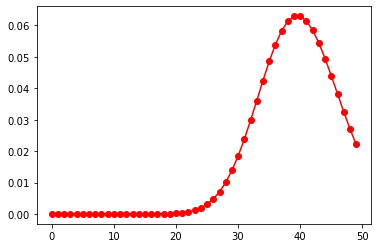

50
40.0
1.2276020479488077e-08


In [9]:
import math
import matplotlib.pyplot as plt
prob_list=[]
k_breakeven=math.trunc(k_breakeven) #取整
for i in range(k_breakeven):        #盈亏线一下是盈利的所有情况的概率，全部相加即为不亏损的概率。
    P = poisson(i,Lambda)
    prob_list.append(P)
prob_profit=math.fsum(prob_list)
print('不亏损的概率：',round(prob_profit,6))
k_list = [i for i in range(k_breakeven)]
plt.plot(k_list,prob_list,'o-r',label='poisson')
plt.show()
print(k_breakeven)
print(Lambda)
print(poisson(10.0,40.0))

In [11]:
import numpy as np
np_array = np.random.rand(10)
index1 = np.where(np_array>0.5)#返回大于0.5的序号
print(index1)
print(np_array[index1])        #np的序号也可以是数组

(array([2, 3, 4, 5]),)
[0.66717507 0.76182737 0.89151596 0.94467235]


In [12]:
np_array = np.round(np.random.rand(5,6),3)
print(np.shape(np_array))
print(np_array)
print(np.sort(np_array,1))#每行进行排序
print(np.min(np_array,0))#每列最小值
print(np.min(np_array,1))#每行最小值
print(np.mean(np_array,0))#每列平均值
print(np_array.mean())#全部的平均值
print(np_array.std())#标准方差
print(np_array.var())#方差

(5, 6)
[[0.05  0.325 0.757 0.519 0.167 0.391]
 [0.176 0.638 0.104 0.53  0.054 0.841]
 [0.455 0.21  0.1   0.692 0.208 0.535]
 [0.304 0.935 0.714 0.502 0.744 0.909]
 [0.752 0.27  0.758 0.302 0.606 0.69 ]]
[[0.05  0.167 0.325 0.391 0.519 0.757]
 [0.054 0.104 0.176 0.53  0.638 0.841]
 [0.1   0.208 0.21  0.455 0.535 0.692]
 [0.304 0.502 0.714 0.744 0.909 0.935]
 [0.27  0.302 0.606 0.69  0.752 0.758]]
[0.05  0.21  0.1   0.302 0.054 0.391]
[0.05  0.054 0.1   0.304 0.27 ]
[0.3474 0.4756 0.4866 0.509  0.3558 0.6732]
0.47459999999999997
0.2670285378007377
0.07130424


In [13]:
np_int_a = np.array([i for i in range(1,10)])
print(np_int_a)
np_int_a.prod()

[1 2 3 4 5 6 7 8 9]


362880

In [61]:
# ---数组间运算---
share = np.array([3564.0626,2943.8779,742.6273,252.1985,437.8242]) #总股本的数组
#A股净资产和净利润
data1_A = np.array([[23448.83,17253.97,7053.08,5436.05,4310.01],[2987.23,1924.35,741.65,808.19,503.30]])
#H股净资产和净利润
data1_H = np.array([[26698.8378,19645.3702,8030.6369,6189.4865,4703.568],[3401.2601,2191.0649,844.4427,920.2051,573.0574]])
#A股每股净资产和每股净收益
data2_A=data1_A/share
#H股每股净资产和每股净收益
data2_H=data1_H/share
price_A = np.array([5.89,3.74,6.12,35.98,6.35]) #A股收盘价
price_H = np.array([5.70,3.30,5.93,38.95,5.41]) #H股收盘价
PB_PE_A = price_A/data2_A #A股市净率和市盈率
PB_PE_H = price_H/data2_H #H股市净率和市盈率
print('A股市净率和市盈率',PB_PE_A)
print('H股市净率和市盈率',PB_PE_H)

A股市净率和市盈率 [[ 0.89523992  0.63812     0.64438218  1.66924551  0.64505272]
 [ 7.02735602  5.72146613  6.12806455 11.22768412  5.52390954]]
H股市净率和市盈率 [[ 0.76090042  0.49450822  0.54837243  1.58706729  0.50358131]
 [ 5.97283249  4.43382442  5.21501327 10.67493711  4.13331879]]


In [81]:
index_Jun17 = np.array([0.0879,0.1570,0.0337,0.4012,-0.4543])*0.01
index_Jun18 = np.array([1.3519,1.1652,-0.7162,0.9976,0.9582])*0.01
index_Jun19 = np.array([0.1453,0.5307,1.7220,2.5578,1.5265])*0.01
index_Jun20 = np.array([0.9401,0.2823,0.6046,1.2350,0.8011])*0.01
index_Jun21 = np.array([-0.1272,-0.2282,-0.9515,-0.2687,0.2079])*0.01
index_Jun24 = np.array([0.0315,0.1241,0.1287,0.1380,-0.2972])*0.01
index_Jun25 = np.array([-0.6709,0.0774,-0.4331,-1.1469,-0.2192])*0.01
index_Jun26 = np.array([-0.0429,-0.0814,-0.5059,0.1277,-0.0914])*0.01
index_Jun27 = np.array([-0.0386,-0.1896,1.1931,1.4154,0.8285])*0.01
index_Jun28 = np.array([0.2766,0.3148,-0.2917,-0.2753,-0.2100])*0.01
# 数组拼接
index_data=np.concatenate((index_Jun17,index_Jun18,index_Jun19,index_Jun20,index_Jun21,index_Jun24,index_Jun25,index_Jun26,index_Jun27,index_Jun28),axis=0)
# 数组变形
index_data = index_data.reshape(10,5)
# 数组转置
index_data = index_data.T
print(index_data)
# 计算股票指数涨跌幅之间的协方差
index_cov = np.cov(index_data)
print('协方差')
print(index_cov)
# 计算各股票指数涨跌幅之间的相关系数
index_corr=np.corrcoef(index_data)
print('相关系数')
print(index_corr)
# 从结果可以看到，第四行和第五行的相关系数最高，达到0.8526.（香港与新加坡）
# 第三行与第一第二行的相关系数不到0.003（日经与道琼斯富时）
# 相关系数矩阵只需要看上三角矩阵或下三角矩阵。因为这是标准的对称矩阵
'''
如何通俗易懂地解释「协方差」与「相关系数」的概念？
https://www.zhihu.com/question/20852004
如果有X,Y两个变量，每个时刻的“X值与其均值之差”乘以“Y值与其均值之差”得到一个乘积，再对这每时刻的乘积求和并求出均值
'''

[[ 0.000879  0.013519  0.001453  0.009401 -0.001272  0.000315 -0.006709
  -0.000429 -0.000386  0.002766]
 [ 0.00157   0.011652  0.005307  0.002823 -0.002282  0.001241  0.000774
  -0.000814 -0.001896  0.003148]
 [ 0.000337 -0.007162  0.01722   0.006046 -0.009515  0.001287 -0.004331
  -0.005059  0.011931 -0.002917]
 [ 0.004012  0.009976  0.025578  0.01235  -0.002687  0.00138  -0.011469
   0.001277  0.014154 -0.002753]
 [-0.004543  0.009582  0.015265  0.008011  0.002079 -0.002972 -0.002192
  -0.000914  0.008285 -0.0021  ]]
协方差
[[3.22853620e-05 1.76659233e-05 1.20310122e-07 2.86216066e-05
  1.84398188e-05]
 [1.76659233e-05 1.66175140e-05 1.04069544e-07 1.60048010e-05
  1.23101953e-05]
 [1.20310122e-07 1.04069544e-07 7.39720842e-05 7.24302290e-05
  3.47468624e-05]
 [2.86216066e-05 1.60048010e-05 7.24302290e-05 1.11563397e-04
  6.06699868e-05]
 [1.84398188e-05 1.23101953e-05 3.47468624e-05 6.06699868e-05
  4.53850365e-05]]
相关系数
[[1.         0.76269427 0.00246187 0.47690328 0.4817231 ]
 [0.76

In [86]:
# 相关系数对角线矩阵
np.diag(index_corr)

array([1., 1., 1., 1., 1.])

In [87]:
# 相关系数矩阵的上三角矩阵
np.triu(index_corr)

array([[1.        , 0.76269427, 0.00246187, 0.47690328, 0.4817231 ],
       [0.        , 1.        , 0.00296829, 0.37171183, 0.44825544],
       [0.        , 0.        , 1.        , 0.79730606, 0.59968795],
       [0.        , 0.        , 0.        , 1.        , 0.85262231],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [88]:
# 相关系数矩阵的下三角矩阵
np.tril(index_corr)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.76269427, 1.        , 0.        , 0.        , 0.        ],
       [0.00246187, 0.00296829, 1.        , 0.        , 0.        ],
       [0.47690328, 0.37171183, 0.79730606, 1.        , 0.        ],
       [0.4817231 , 0.44825544, 0.59968795, 0.85262231, 1.        ]])

In [89]:
# 相关系数矩阵的迹
np.trace(index_corr)
'''
在线性代数中，一个n×n矩阵A的主对角线（从左上方至右下方的对角线）上各个元素的总和被称为矩阵A的迹（或迹数），一般记作tr(A)。
'''

5.0

In [20]:
price_change = np.array([[8.2117,2.2298,2.3571,11.3765,5.2770],[4.0458,0.6972,2.8895,3.2742,5.1003],[5.7123,15.9447,-1.8933,3.7342,1.7008],[3.8217,0.6732,1.1043,1.6990,2.4105],[12.6486,2.0497,3.0867,4.6562,4.7228]]) * 0.01
print(price_change)
weight = np.array([0.1,0.15,0.2,0.25,0.3])
a = [0.082117,0.040458,  0.057123,  0.038217,  0.126486 ]
b = a*weight
print('b',b)
print('b_fsum',math.fsum(b))
value_change = np.dot(weight,price_change)   #内积  sum（行*排）
print(value_change)

[[ 0.082117  0.022298  0.023571  0.113765  0.05277 ]
 [ 0.040458  0.006972  0.028895  0.032742  0.051003]
 [ 0.057123  0.159447 -0.018933  0.037342  0.017008]
 [ 0.038217  0.006732  0.011043  0.01699   0.024105]
 [ 0.126486  0.020497  0.030867  0.046562  0.047228]]
b [0.0082117  0.0060687  0.0114246  0.00955425 0.0379458 ]
b_fsum 0.07320505
[0.07320505 0.0429971  0.0149256  0.0419723  0.0365237 ]


In [93]:
value_change_total=value_change.sum()
value_change_total

6288712.5

In [19]:
# 内积   sum（行*排）
a=np.array([[1 for i in range(1,6)],[2 for i in range(1,6)],[3 for i in range(1,6)],[4 for i in range(1,6)],[5 for i in range(1,6)]])
print(a)
print('dot:',np.dot(weight,a))
1*.1+2*.15+3*.20+4*.25+5*.3

[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]
dot: [3.5 3.5 3.5 3.5 3.5]


3.5

In [22]:
# 矩阵行列式
import numpy.linalg as la
la.det(price_change)

-1.7501069902315793e-07

In [24]:
# 计算逆矩阵
print(price_change)
print(la.inv(price_change))
price_change_inv = la.inv(price_change)
print('price_change_inv*price_change=',price_change_inv*price_change)

[[ 0.082117  0.022298  0.023571  0.113765  0.05277 ]
 [ 0.040458  0.006972  0.028895  0.032742  0.051003]
 [ 0.057123  0.159447 -0.018933  0.037342  0.017008]
 [ 0.038217  0.006732  0.011043  0.01699   0.024105]
 [ 0.126486  0.020497  0.030867  0.046562  0.047228]]
[[  -1.55001629  -16.6620793    -1.03291035   25.87936478    6.88904974]
 [  -3.23620459   17.53185215    6.99589861  -53.6389033     9.54046289]
 [  -7.87749564   81.32832662    1.24607203 -278.5733853    62.70697598]
 [  13.28586941   -1.42605251   -0.70179695  -24.96870404   -0.30819851]
 [  -2.39421842  -14.73262073   -0.39238739  160.65420406  -42.09674563]]
price_change_inv*price_change= [[-1.27282688e-01 -3.71531044e-01 -2.43467298e-02  2.94416593e+00
   3.63535155e-01]
 [-1.30930365e-01  1.22232073e-01  2.02146490e-01 -1.75624497e+00
   4.86592229e-01]
 [-4.49986184e-01  1.29675577e+01 -2.35918818e-02 -1.04024874e+01
   1.06652025e+00]
 [ 5.07746071e-01 -9.60018552e-03 -7.74994367e-03 -4.24218282e-01
  -7.42912509e-0

In [115]:
# 矩阵的特征值分解
la.eig(price_change)
#矩阵特征值分析的输出结果中，j代表了复数中的虚数单位i。

(array([ 0.21629349+0.j        , -0.06269276+0.j        ,
         0.02397042+0.j        , -0.02159857+0.00848117j,
        -0.02159857-0.00848117j]),
 array([[ 0.54526238+0.j        ,  0.01193373+0.j        ,
         -0.22021644+0.j        ,  0.10554606-0.05607351j,
          0.10554606+0.05607351j],
        [ 0.34270002+0.j        ,  0.22553004+0.j        ,
          0.35132247+0.j        ,  0.00906146+0.05210189j,
          0.00906146-0.05210189j],
        [ 0.44085416+0.j        , -0.95395102+0.j        ,
          0.89107334+0.j        ,  0.81737458+0.j        ,
          0.81737458-0.j        ],
        [ 0.21170819+0.j        ,  0.0496262 +0.j        ,
         -0.05995677+0.j        , -0.00450785+0.05836251j,
         -0.00450785-0.05836251j],
        [ 0.5882796 +0.j        ,  0.19107192+0.j        ,
         -0.17455869+0.j        , -0.55764173-0.02066569j,
         -0.55764173+0.02066569j]]))

In [116]:
# 矩阵的奇异值分解
la.svd(price_change)

(array([[-5.65812932e-01,  3.33283498e-01,  7.09291647e-01,
          2.55855881e-01, -1.48648560e-02],
        [-2.67536972e-01,  2.33001810e-01,  8.53243383e-03,
         -9.05235289e-01,  2.33688670e-01],
        [-5.27427077e-01, -8.47419180e-01, -6.05084267e-04,
         -6.04249257e-02,  7.06216274e-03],
        [-1.85147596e-01,  1.18927139e-01, -1.65398163e-01,
         -1.60906083e-01, -9.47802397e-01],
        [-5.43894053e-01,  3.19952083e-01, -6.85182924e-01,
          2.92480598e-01,  2.16308539e-01]]),
 array([0.24781306, 0.13782786, 0.0579821 , 0.03057659, 0.00289015]),
 array([[-0.6589074 , -0.4478095 , -0.12071375, -0.48946186, -0.33341112],
        [ 0.24234868, -0.86124624,  0.30343555,  0.22360353,  0.23968805],
        [-0.59383031,  0.01071261, -0.10346848,  0.79741403,  0.02599883],
        [ 0.38525584, -0.17428513, -0.3836549 ,  0.2647951 , -0.77710688],
        [-0.07779233,  0.16501973,  0.85758863,  0.06665564, -0.47625163]]))

In [130]:
# 股票收益率的相关系数矩阵
price_corr = np.corrcoef(price_change)
print(np.triu(price_corr))
#乐鑫科技与虹软科技相关系数：0.95    正相关
#澜起科技与心脉医疗相关系数：-0.71   负相关

[[ 1.          0.44614748 -0.17984346  0.53213741  0.51060184]
 [ 0.          1.         -0.70635396  0.72887498  0.50733022]
 [ 0.          0.          1.         -0.2411109  -0.11018642]
 [ 0.          0.          0.          1.          0.94959116]
 [ 0.          0.          0.          0.          1.        ]]


In [131]:
# 矩阵的正交三角分解
la.qr(price_corr)

(array([[-0.75052834,  0.51263154,  0.35577449,  0.21620998, -0.02436944],
        [-0.33484632, -0.60510188, -0.16841548,  0.59206488,  0.37792204],
        [ 0.13497761,  0.55961001, -0.72469708,  0.35040581,  0.14369271],
        [-0.3993842 , -0.23883486, -0.46900442, -0.13165262, -0.73902139],
        [-0.38322115, -0.02924334, -0.31608501, -0.68014394,  0.53831297]]),
 array([[-1.33239472e+00, -1.25055544e+00,  6.44996908e-01,
         -1.43927751e+00, -1.33044437e+00],
        [ 0.00000000e+00, -9.60592136e-01,  9.55640591e-01,
         -5.69785345e-01, -3.62936096e-01],
        [ 0.00000000e+00,  0.00000000e+00, -5.21809498e-01,
         -5.27856502e-01, -5.85378836e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -3.15403269e-01, -4.33000453e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -7.07743243e-17]]))

In [145]:
# 矩阵的乔斯基分解
# print(price_corr)
la.cholesky(price_corr)
# 疑问？？？？？？？？？？？？？？未解决

LinAlgError: Matrix is not positive definite

In [147]:
# 二项分布
# 可以简单的理解成：只有两种结果，真或假。如果为真的概率为6%，那么重复100次，会有大约6次为真，大约94次为假
# 二项分布就是抛硬币游戏。
num = 10000
prob1 = 0.06
binomial_mean = num * prob1 #二项分布的均值
binomial_std = np.sqrt(num*prob1*(1-prob1)) #二项分布的标准差
print('二项分布的期望值：' ,binomial_mean)
print('二项分布的标准差：' ,binomial_std)

二项分布的期望值： 600.0
二项分布的标准差： 23.748684174075834


In [152]:
# 二项分布式随机抽样
import numpy.random as npr
I = 100
# 重复100次，每次试验10000次，成功概率0.06。每次重复成功的次数组成数组。
random_binomail = npr.binomial(num,prob1,I)
print('二项式随机抽样',random_binomail)
print('随机均值：',random_binomail.mean())
print('随机标准差：',random_binomail.std())

二项式随机抽样 [582 594 593 622 608 596 613 614 599 565 600 591 632 617 592 583 572 619
 611 566 595 596 595 579 618 587 595 588 623 609 623 612 599 624 625 648
 570 597 590 656 604 602 605 620 578 647 596 596 622 564 607 604 643 630
 617 628 601 594 630 571 623 587 572 578 597 599 607 619 601 602 580 615
 588 606 639 624 552 602 650 609 587 590 606 615 570 569 634 625 654 594
 603 568 620 596 587 586 557 580 614 587]
随机均值： 602.49
随机标准差： 22.03746582527129


In [154]:
# 几何分布
# 几何分布是二项分布的延伸，表示在n次伯努利试验中，试验k次出现第一次成功的机率。
# P(k) = (1-p)^(k-1)*p
# 几何分布的期望（平均值）： E = (1-p)/p
# 几何分布的标准差：        D = sqrt((1-p)/p^2)
prob2 = 0.005  #每份保单每月理赔的概率
geometric_mean=(1-prob2)/prob2
geometric_std = np.sqrt((1-prob2)/prob2**2)
print('几何分布的期望',geometric_mean)
print('几何分布的标准差',geometric_std)

几何分布的期望 199.0
几何分布的标准差 199.49937343260004


In [169]:
# 几何分布随机抽样
I_new = 100
random_geometric = npr.geometric(prob2,I_new)
print('random geometric : ',random_geometric)
print('min:',random_geometric.min())
print('max:',random_geometric.max())
print('geometric_mean:', random_geometric.mean())
print('geometric_std:',random_geometric.std())

random geometric :  [ 91 184 293 549 175 164 250 123 507 303  20  23  20  12 119 889 157 210
   2 121 287  81 431 275  50  80  94  26 836 886  73 406  99 222   3 122
   6 485 314  69 103  35 519  65 100 280 173  22  17 186  31  14 367 496
  29  19 217  51   7 110   4  68  57  18 218 142 240  62 654 479 185  42
  27  12 143 112  38  18 111 356 221 346 495 381 426 280  76 100 195 125
 116 558 371 252  96 124 340 378 490   4]
min: 2
max: 889
geometric_mean: 202.58
geometric_std: 199.01417939433358


In [34]:
import numpy as np
# 股价：
price = np.array([[7.77,7.73,7.69,7.62,7.64,7.61,7.73,7.68,7.67,7.66],[6.03,5.96,5.9,5.83,5.82,5.81,5.9,5.88,5.85,5.87]])
# 涨跌幅
#change = np.array([[0.52,-0.51,-0.52,-0.91,0.26,-0.39,1.58,-0.65,-0.13,-0.13],[1.69,-1.16,-1.01,-1.19,-0.17,-0.17,1.55,-0.34,-0.51,0.34]])*0.01
change = np.array([[0.005175,-0.005148,-0.005175,-0.009103,0.002625,-0.003927,0.015769,-0.006468,-0.001302,-0.001304],[0.016863,-0.011609,-0.010067,-0.011864,-0.001715,-0.001718,0.015491,-0.00339,-0.005102,0.003419]])

# 根据数据获得一下数据
price_mean = price.mean(axis=1)
print('中国石油股价的均值：',price_mean[0])
print('中国石化股价的均值：',price_mean[1])
price_std = price.std(axis=1)
print('中国石油股价的标准差：',round(price_std[0],6))
print('中国石化股价的标准差：',round(price_std[1],6))
change_mean = change.mean(axis=1)
print('中国石油涨跌幅的均值：',round(change_mean[0],6))
print('中国石化涨跌幅的均值：',round(change_mean[1],6))
change_std = change.std(axis=1)
print('中国石油涨跌幅的标准差：',round(change_std[0],6))
print('中国石化涨跌幅的标准差：',round(change_std[1],6))

中国石油股价的均值： 7.68
中国石化股价的均值： 5.885
中国石油股价的标准差： 0.048785
中国石化股价的标准差： 0.064382
中国石油涨跌幅的均值： -0.000886
中国石化涨跌幅的均值： -0.000969
中国石油涨跌幅的标准差： 0.006865
中国石化涨跌幅的标准差： 0.009731


In [37]:
import numpy.random as npr
# 随机抽样次数
I = 10000
# 按照中国石油股价涨跌幅服从的正态分布进行随机抽样
random_normal_cnpc = npr.normal(change_mean[0], change_std[0], I)
random_normal_cnpc_mean = random_normal_cnpc.mean()
random_normal_cnpc_std = random_normal_cnpc.std()
print('中国石油涨跌幅的均值：',round(random_normal_cnpc_mean,6))
print('中国石油涨跌幅的标准差：',round(random_normal_cnpc_std,6))

# 按照中国石化股价涨跌幅服从的正态分布进行随机抽样
random_normal_sinopec = npr.normal(change_mean[1], change_std[1], I)
random_normal_sinopec_mean = random_normal_sinopec.mean()
random_normal_sinopec_std = random_normal_sinopec.std()
print('中国石化涨跌幅的均值：',round(random_normal_sinopec_mean,6))
print('中国石化涨跌幅的标准差：',round(random_normal_sinopec_std,6))

中国石油涨跌幅的均值： -0.001024
中国石油涨跌幅的标准差： 0.006817
中国石化涨跌幅的均值： -0.001072
中国石化涨跌幅的标准差： 0.009737
